
## Caso práctico: análisis de datos climáticos

Genera el código necesario para realizar las siguientes tareas que se encomiendan:

1 Identifica el número de columnas y determina cuáles son los encabezados que tiene este archivo.
2 Descarga los datos correspondientes al histórico de temperaturas en la ciudad y represéntalos gráficamente (no incorpores, de momento, 
  las fechas de captura de cada dato). Utiliza el estilo ‘seaborn’ de pyplot y representa la línea de temperaturas en color rojo.
3 Determina el número de mediciones de temperatura que contiene el fichero Basilea_clima.csv.
4 Identifica algunos valores recogidos en la primera columna y proporciona una explicación al número de mediciones de temperatura existentes.
5 Un número tan elevado de mediciones distorsiona el análisis de las temperaturas diarias. 
  Por esto, sustituye todas las mediciones de temperatura que se realizan en un día por el valor medio que se alcanzó en dicho día, 
  es decir, has de crear una nueva lista en la que, para cada día, incorpores la media de las temperaturas del día en cuestión. 
  Considera exclusivamente los días correspondientes al mes de enero (desde el 1/01 hasta el 31/01). 
  Genera una segunda lista con las fechas correspondientes a dicho mes y procede a la representación gráfica. 
Por último, comprueba que, en efecto, la visualización es ahora mucho más sencilla


#### *Cargamos las librerias necesarias*

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
from datetime import datetime

#### *se definen listas y variables*

In [ ]:
temperaturas = []
muestras_temperatura = []
muestras_enero = []

#### *se carga como dataframe el archivo CSV con los datos usando pandas*

In [14]:
nom_fich = 'Basilea_clima.csv'
df_basilea_clima = pd.read_csv(nom_fich)

print(df_basilea_clima.columns.values)# muestra los encabezados de cada columna

print(df_basilea_clima.head(25))# muestra los primeros 25 valores de la columna 0 'timestamp' del dataframe, lo que demuetra que se toma una muestra de temperatura cada hora de cada dia.

print(df_basilea_clima.shape) # muestra el numero de mediciones que contiene el archivo CSV

['timestamp' 'Basilea_Temperature' 'Basilea_Relative_Humidity'
 'Basilea_Wind_Speed' 'Basilea_Wind_Direction']
        timestamp  Basilea_Temperature  Basilea_Relative_Humidity  \
0   20210101T0000             3.290529                       89.0   
1   20210101T0100             3.320528                       87.0   
2   20210101T0200             2.350528                       90.0   
3   20210101T0300             2.020529                       88.0   
4   20210101T0400             1.710529                       86.0   
5   20210101T0500             1.250529                       86.0   
6   20210101T0600             0.570529                       88.0   
7   20210101T0700            -0.289471                       88.0   
8   20210101T0800            -0.859471                       91.0   
9   20210101T0900            -0.919471                       90.0   
10  20210101T1000            -0.619471                       89.0   
11  20210101T1100             0.290529                       

#### *Conversion y filtrado de fechas*

In [15]:
# 1. Convertimos la columna de 'timestamp' o fecha a tipo datetime
df_basilea_clima['timestamp'] = pd.to_datetime(df_basilea_clima['timestamp'], dayfirst=True)


# 2. Filtrar solo los datos de enero
df_enero = df_basilea_clima[df_basilea_clima['timestamp'].dt.month == 1]
print(f'registros de enero: {df_enero}')

#Filtrar solo los datos de febrero
df_febrero = df_basilea_clima[df_basilea_clima['timestamp'].dt.month == 2]
print(f'registros de febrero: {df_febrero}')

# 3. Agrupar por día y calcular la media
media_diaria_enero = df_enero.groupby(df_enero['timestamp'].dt.date)['Basilea_Temperature'].mean()

# Calcular la media de cada mes
media_mensual = df_basilea_clima.groupby(df_basilea_clima['timestamp'].dt.to_period('M'))['Basilea_Temperature'].mean()

registros de enero:               timestamp  Basilea_Temperature  Basilea_Relative_Humidity  \
0   2021-01-01 00:00:00             3.290529                       89.0   
1   2021-01-01 01:00:00             3.320528                       87.0   
2   2021-01-01 02:00:00             2.350528                       90.0   
3   2021-01-01 03:00:00             2.020529                       88.0   
4   2021-01-01 04:00:00             1.710529                       86.0   
..                  ...                  ...                        ...   
739 2021-01-31 19:00:00             7.950529                       83.0   
740 2021-01-31 20:00:00             7.840528                       85.0   
741 2021-01-31 21:00:00             7.760529                       85.0   
742 2021-01-31 22:00:00             7.780528                       85.0   
743 2021-01-31 23:00:00             7.420528                       84.0   

     Basilea_Wind_Speed  Basilea_Wind_Direction  
0              5.091168      

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14712\2863053831.py:2: UserWarning: Parsing dates in %Y%m%dT%H%M format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_basilea_clima['timestamp'] = pd.to_datetime(df_basilea_clima['timestamp'], dayfirst=True)


#### *otra forma de abrir el CSV para lectura*

In [16]:
with open(nom_fich) as f:
    lector = csv.reader(f, delimiter=',')
    encabezados = next(lector)
    for linea in lector:
        v_temperaturas = float(linea[1])
        temperaturas.append(v_temperaturas)

#### *creacion del grafico de temperaturas*

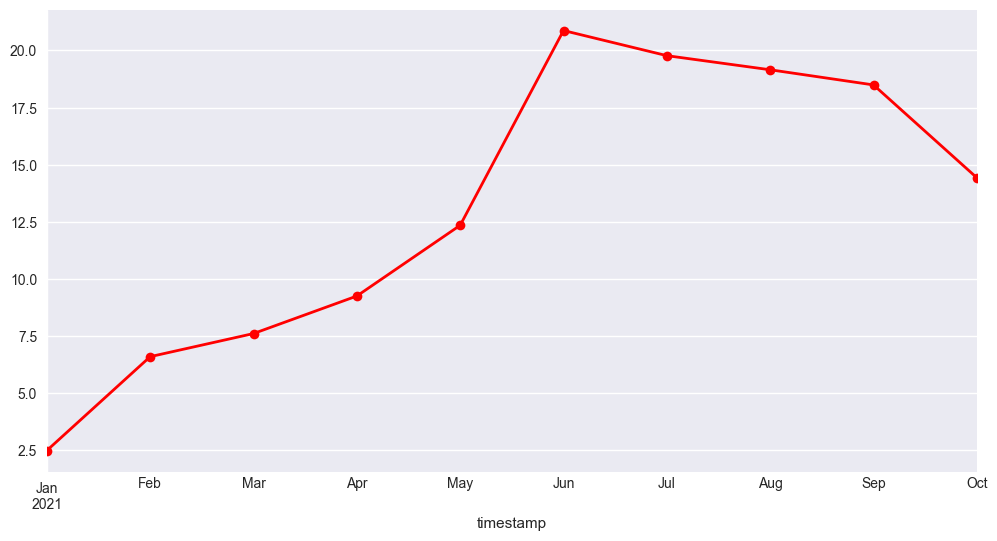

In [17]:
plt.style.use('seaborn-v0_8')

plt.figure(figsize=(12,6))
media_mensual.plot(marker="o", color="red", linewidth=2)

'''
fig,ax = plt.subplots()
ax.plot(media_mensual, c='red')
'''

plt.show()